In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('Data_analyst_raport.xlsx',index_col='ID')
dfs=pd.read_excel('Data_scientist_raport.xlsx',index_col='ID')
df.head()

,title,company_name,location,via,description,job_id,skills,programs,languages,remote,category
ID,,,,,,,,,,,
0,Junior Data Analyst,LeasingTeam Group,"Warsaw, Poland",via LinkedIn,LeasingTeam Professional supports Polish and g...,eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0Ii...,vba,"excel,jira,tableau","polish,english",No data,junior data analyst
1,Data Analyst,UBS,"Kraków, Poland",via Jooble,Data Analyst\n\nPoland\n\nBusiness development...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,"reports,sql,r","tableau,excel,sharepoint",english,Yes,data analyst
2,Data Visualization Analyst,SAS,"Warsaw, Poland",via Recruit.net,"Are you a problem solver, explorer, and knowle...",eyJqb2JfdGl0bGUiOiJEYXRhIFZpc3VhbGl6YXRpb24gQW...,"sas,reports,sql","sas,power BI,tableau","polish,english",No data,data analyst
3,"Data Scientist, Tools & Workflows",Bolt,Poland (+1 other),via AngelList,We are building a top European data science te...,eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCwgVG9vbH...,"python,sql,app","machine learning,pandas,numpy,sklearn,azure",english,No data,data scientist
4,Business Analyst,J&J Family of Companies,Poland,via Recruit.net,Business Analyst - 2206092174W\nDescription\nB...,eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBBbmFseXN0IiwiaH...,"reports,sql","sap,tableau,power BI","english,polish",No data,business analyst


In [2]:
# change strings to lists - there are some NaN's but there is no reason to delete row, because in one column is NaN
df['programs']=df['programs'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['skills']=df['skills'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['languages']=df['languages'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
dfs['programs']=dfs['programs'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
dfs['skills']=dfs['skills'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
dfs['languages']=dfs['languages'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Data Analyst

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
from collections import Counter

In [5]:
# function printing bar chart for colummns-lists (exaple: programs - 'python','jira')
def graphc(df,column_name,xname,yname,title,c=20):
    column=df[column_name]
    count = Counter(column.sum()).most_common(c)

    save=pd.DataFrame(count)
    save=save.rename(columns={'index':'ID', 0:f'{column_name}', 1:'times'})
    save.index.name='ID'
    save.to_excel(f'./Counter - tables/{title}.xlsx')
    
    x,y=zip(*count)
    plt.figure(figsize=(10, 8), dpi=120)
    plt.xticks(rotation='vertical',fontsize=12)

    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.bar(x,y)
    plt.title(title, fontdict={'fontname': 'Arial', 'fontsize':25})
    plt.subplots_adjust(bottom=0.2) 
    plt.savefig(f'./charts/{title}.png')
    plt.show()

In [6]:
# function for printing bar chart for listed columns (example: location)
def graph_list(df,column_name,xname,yname,title,c=20):
    column=list(df[column_name])
    count = Counter(column).most_common(c)

    x,y=zip(*count)
    plt.figure(figsize=(10, 8),dpi=120)
    plt.xticks(rotation='vertical',fontsize=12)
    
    save=pd.DataFrame(count)
    save=save.rename(columns={'index':'ID', 0:f'{column_name}', 1:'times'})
    save.index.name='ID'
    save.to_excel(f'./Counter - tables/{title}.xlsx')

    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.bar(x,y)
    plt.title(title, fontdict={'fontname': 'Arial', 'fontsize':25})
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f'./charts/{title}.png')
    plt.show()

In [7]:
# function for printing pie chart for listed columns
def graph_list_circle(df,column_name,xname,yname,title,c=20):
    column=list(df[column_name])
    colum=str(column)
    count = Counter(column).most_common(c)
    
    save=pd.DataFrame(count)
    save=save.rename(columns={'index':'ID', 0:f'{column_name}', 1:'times'})
    save.index.name='ID'
    save.to_excel(f'./Counter - tables/{title}.xlsx')

    x,y=zip(*count)
    plt.figure(dpi=120,)
    plt.xticks(rotation='vertical', fontsize=12)

    plt.pie(y,labels=x,autopct='%1.1f%%',startangle=90)
    plt.title(title, fontdict={'fontname': 'Arial', 'fontsize':25})
    plt.savefig(f'./charts/{title}.png',dpi=300)
    plt.show()

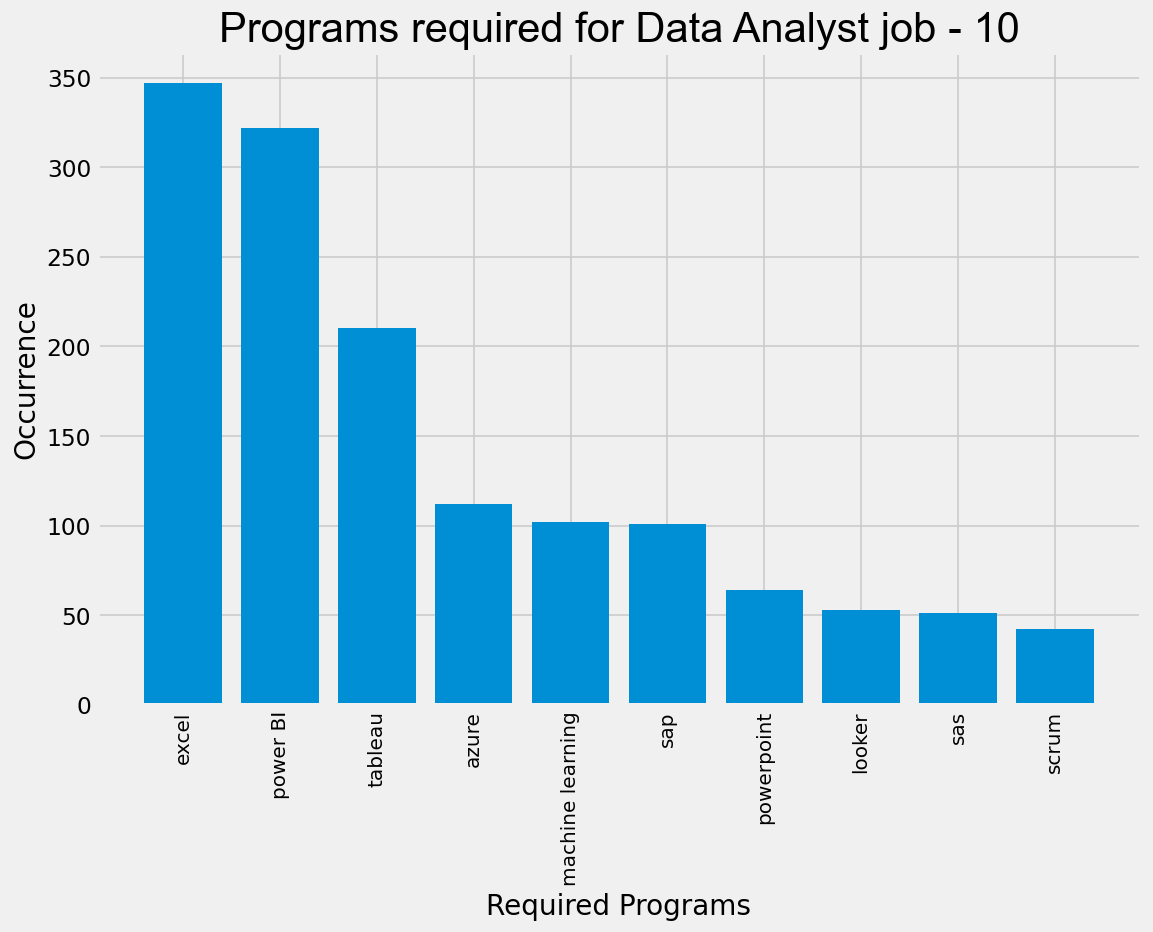

In [8]:
graphc(df,'programs','Required Programs','Occurrence','Programs required for Data Analyst job - 10',10)

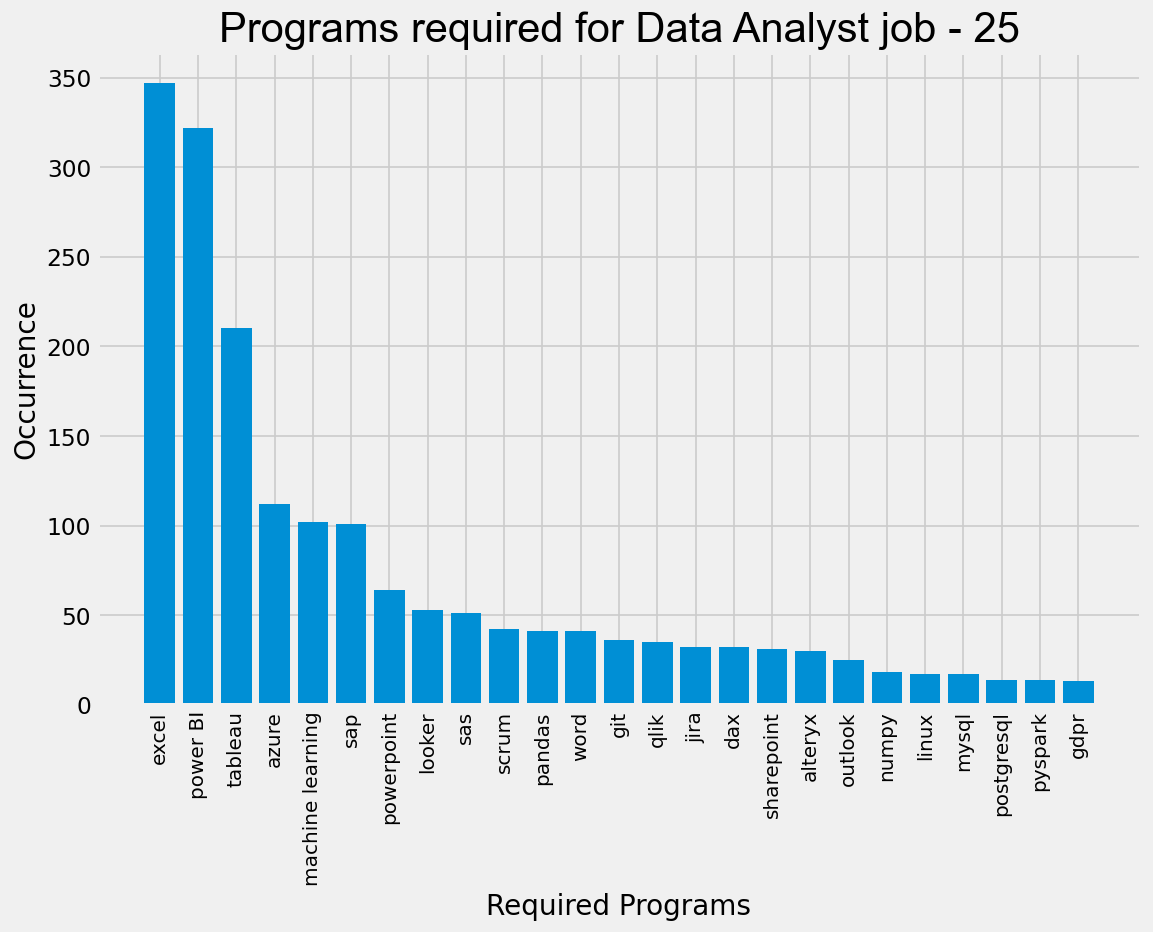

In [9]:
graphc(df,'programs','Required Programs','Occurrence','Programs required for Data Analyst job - 25',25)

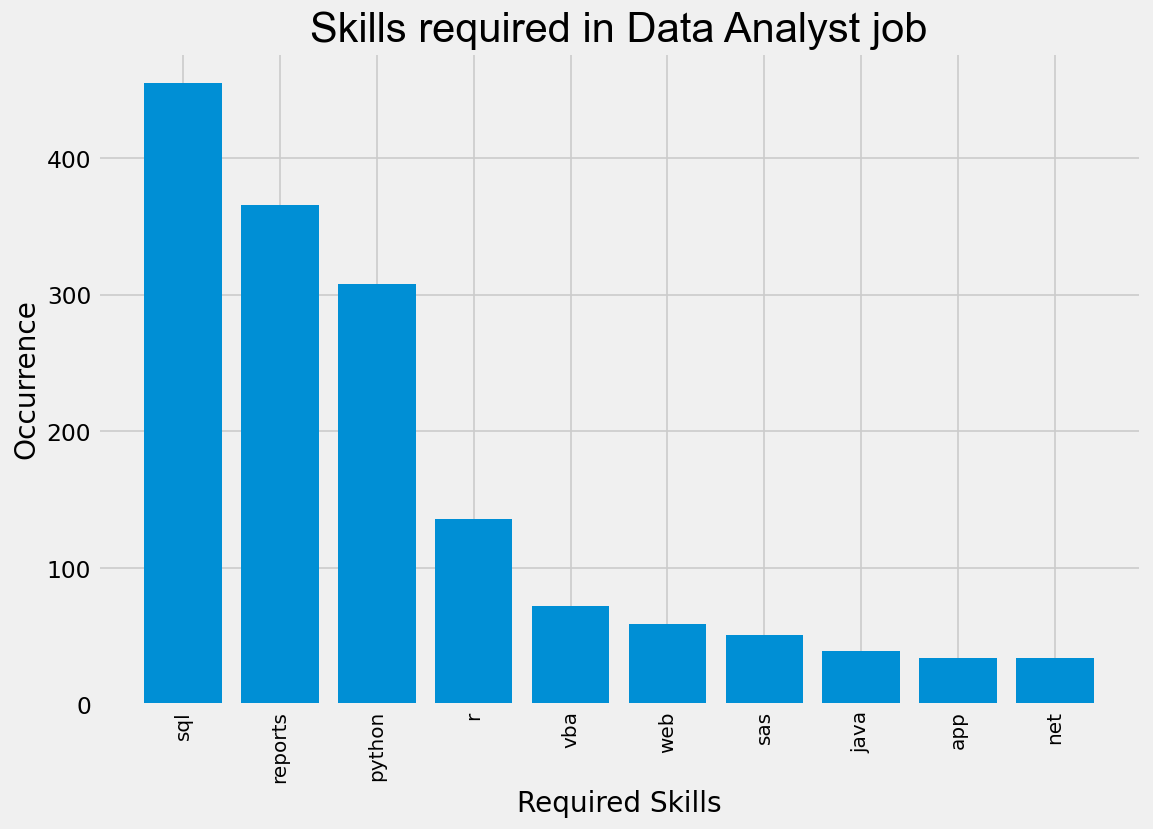

In [10]:
graphc(df,'skills','Required Skills','Occurrence','Skills required in Data Analyst job',10)

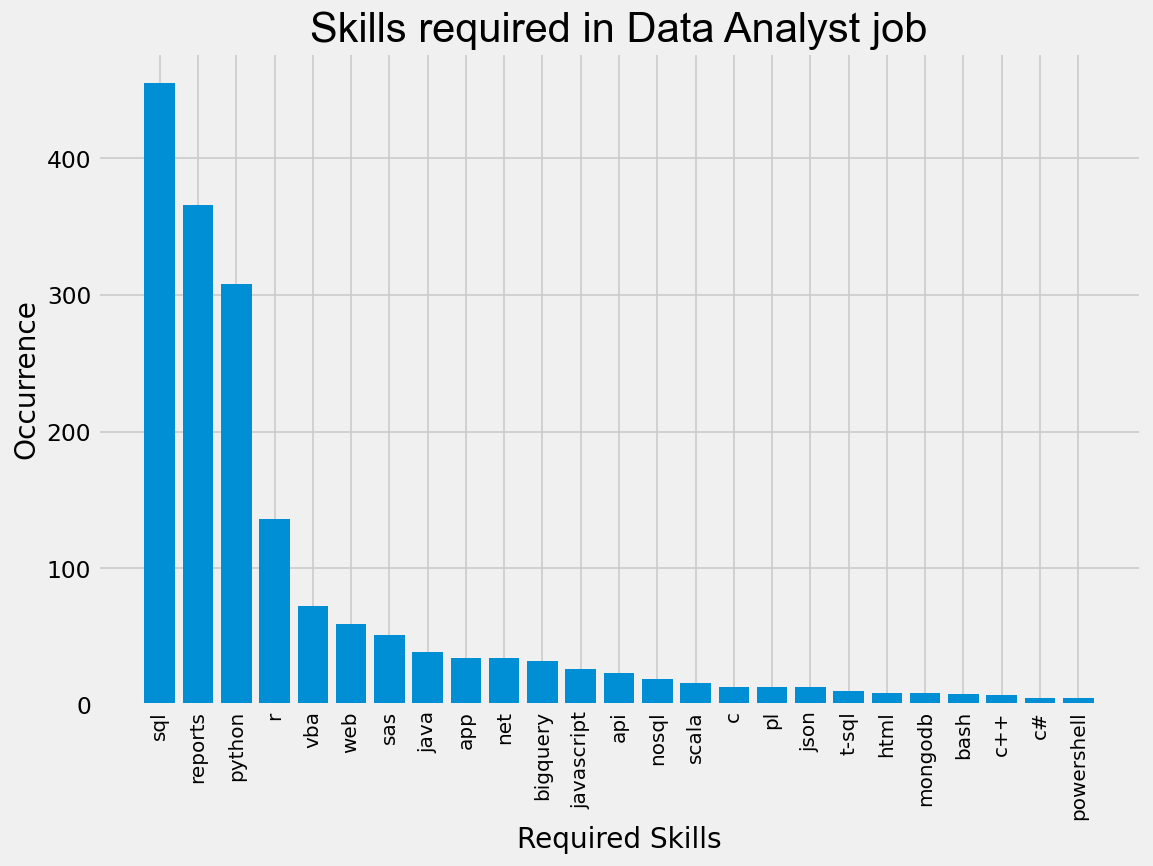

In [11]:
graphc(df,'skills','Required Skills','Occurrence','Skills required in Data Analyst job',25)

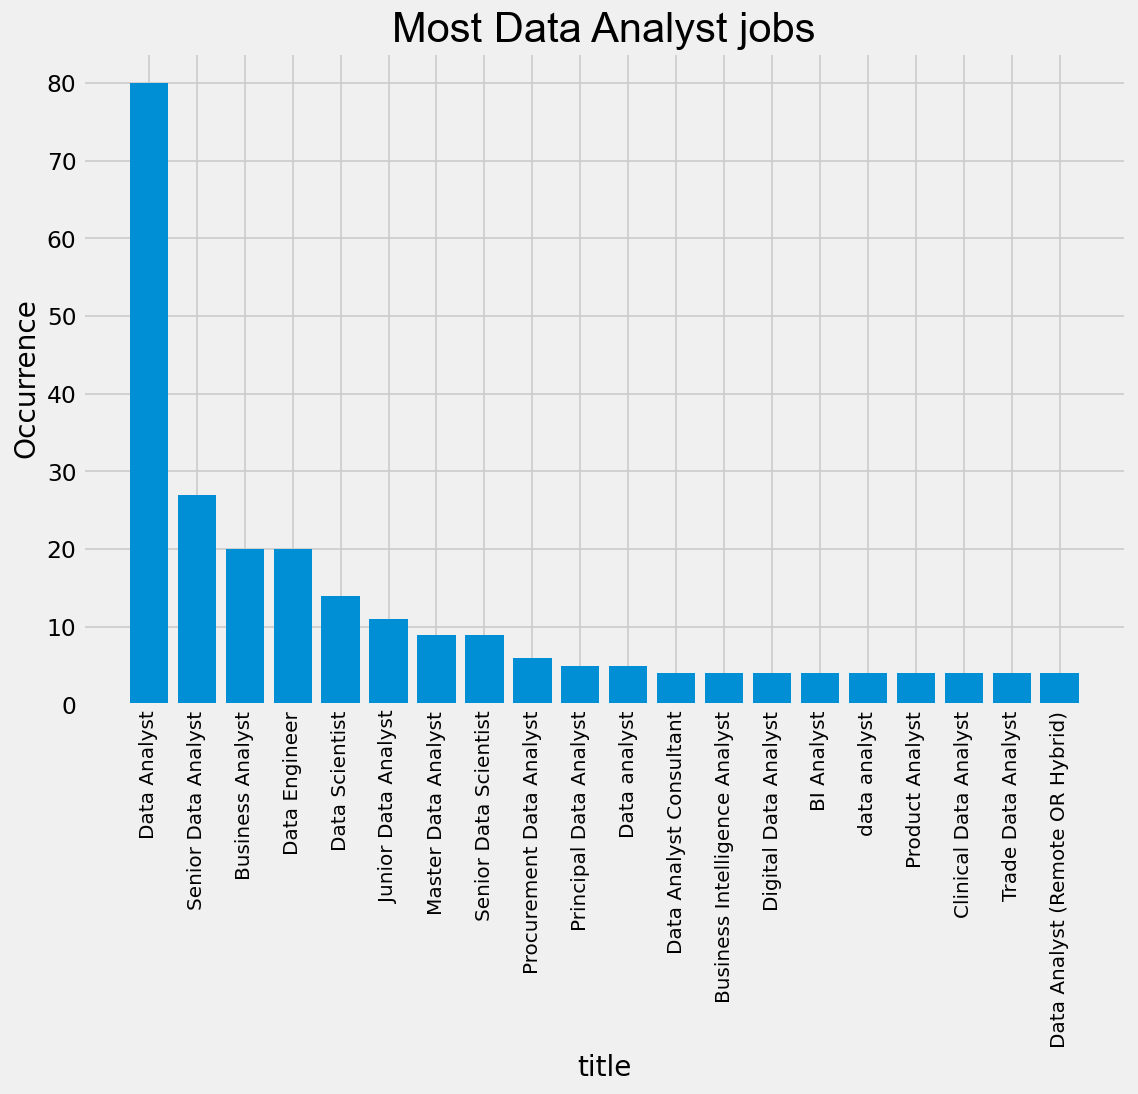

In [12]:
graph_list(df,'title','title','Occurrence','Most Data Analyst jobs')

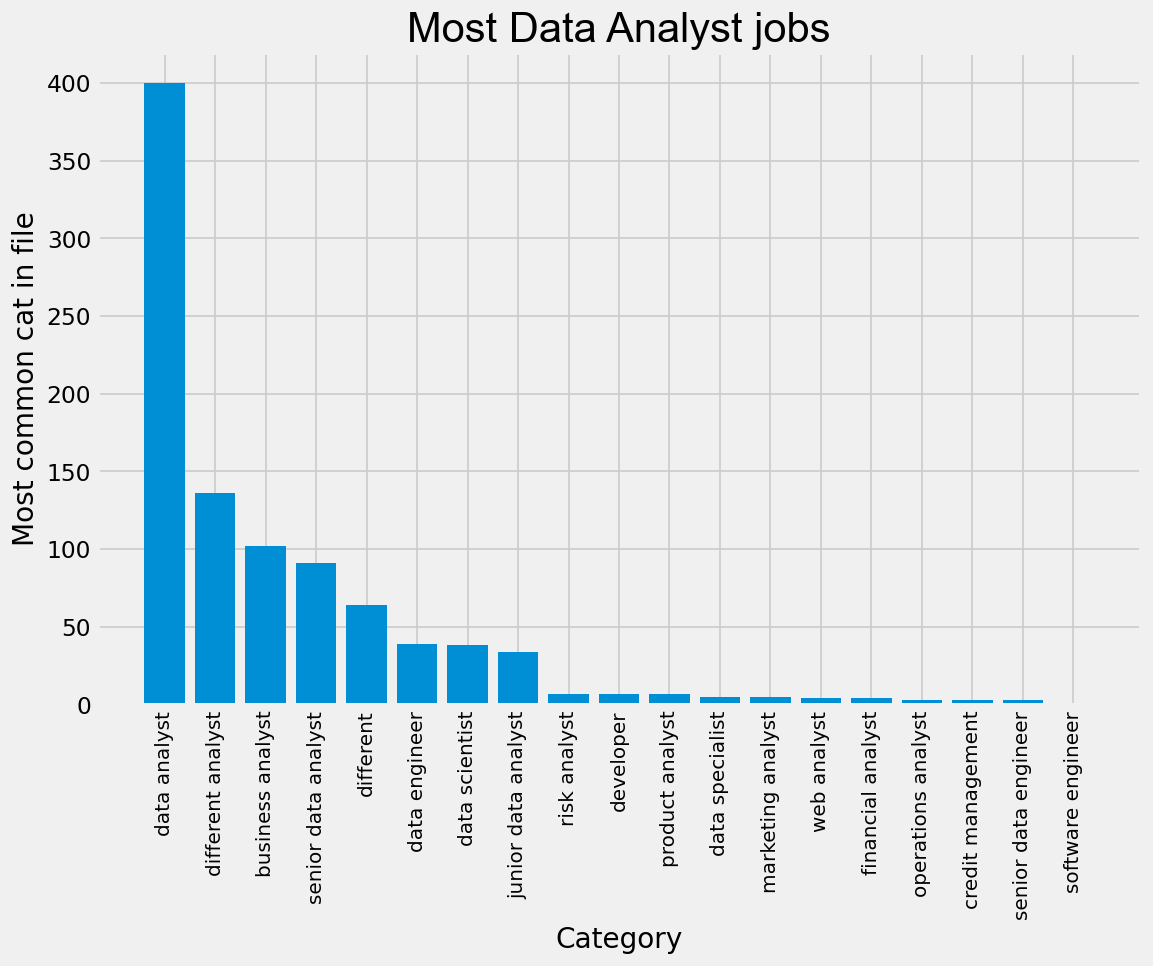

In [13]:
graph_list(df,'category','Category','Most common cat in file','Most Data Analyst jobs')

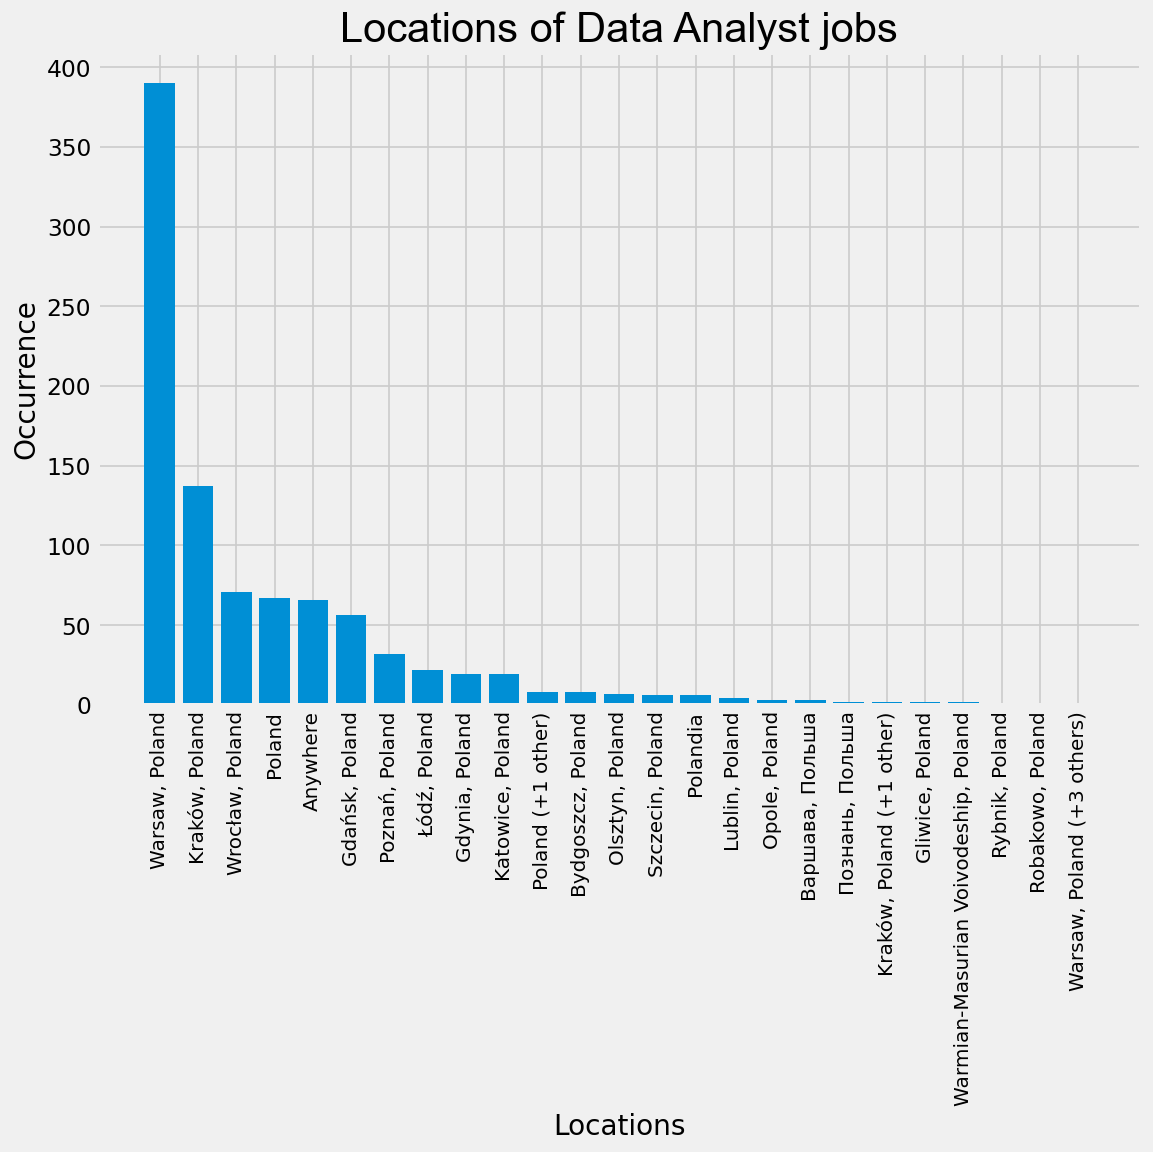

In [14]:
graph_list(df,'location','Locations','Occurrence','Locations of Data Analyst jobs',25)

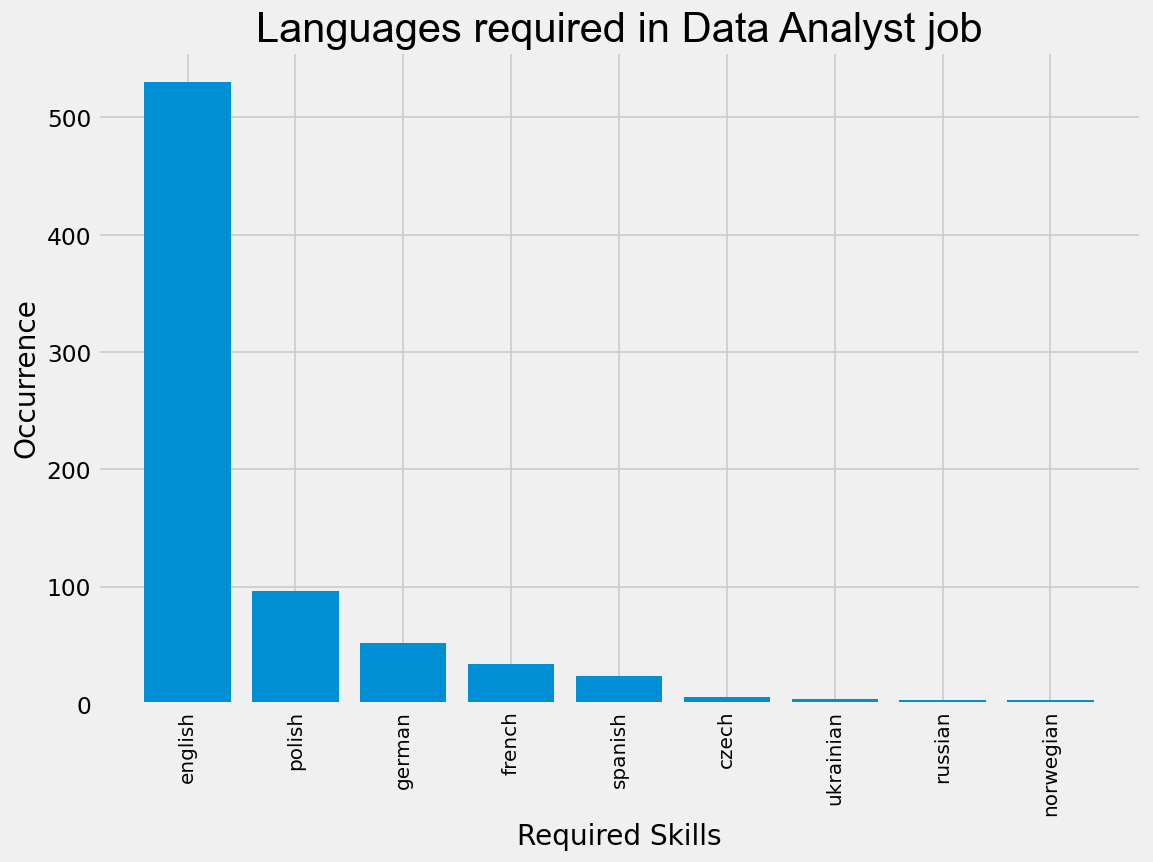

In [15]:
graphc(df,'languages','Required Skills','Occurrence','Languages required in Data Analyst job',10)

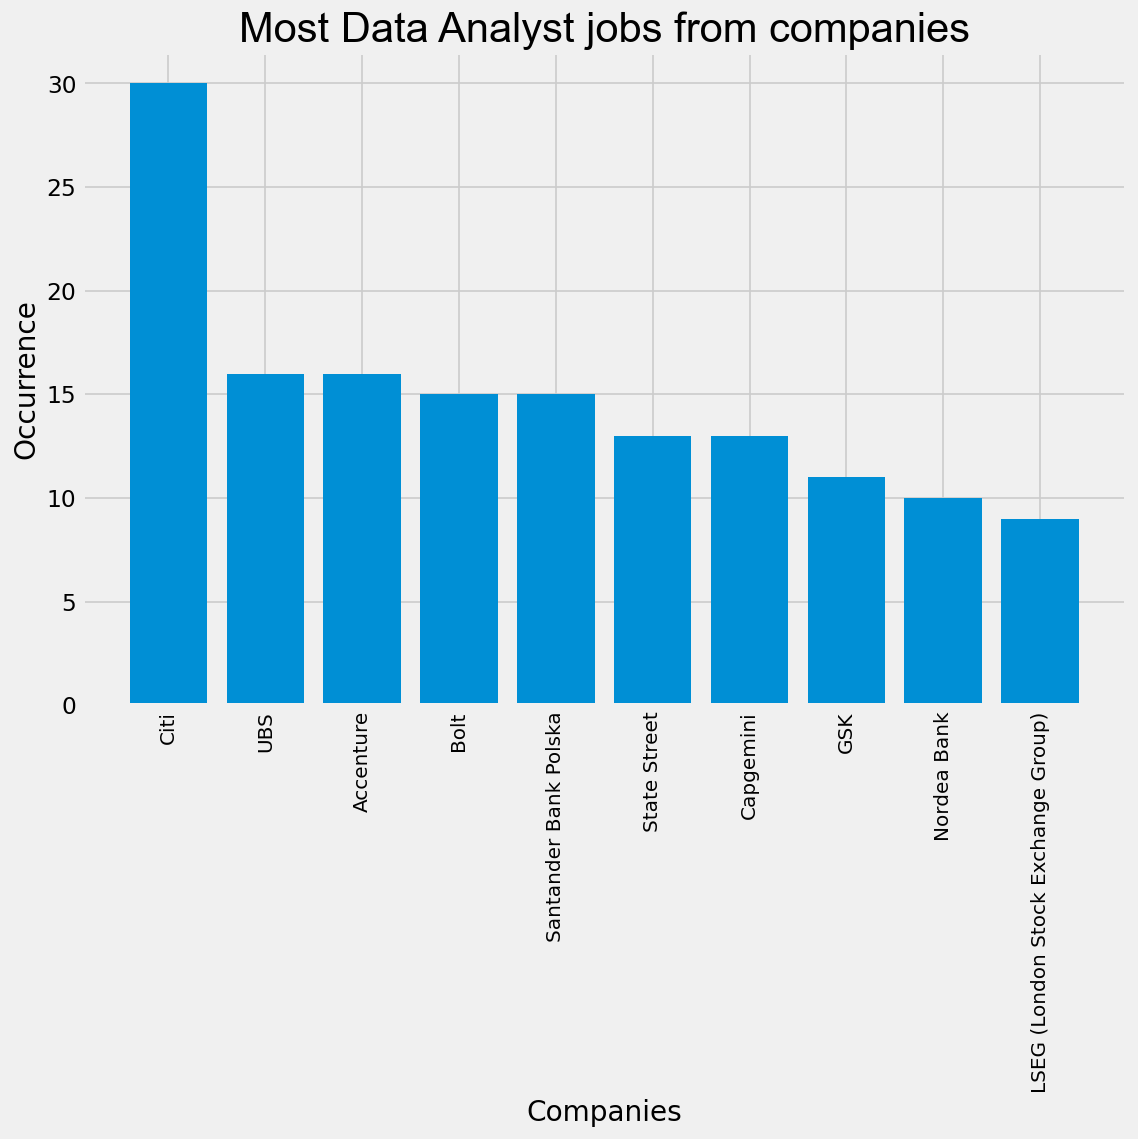

In [16]:
graph_list(df,'company_name','Companies','Occurrence','Most Data Analyst jobs from companies',10)

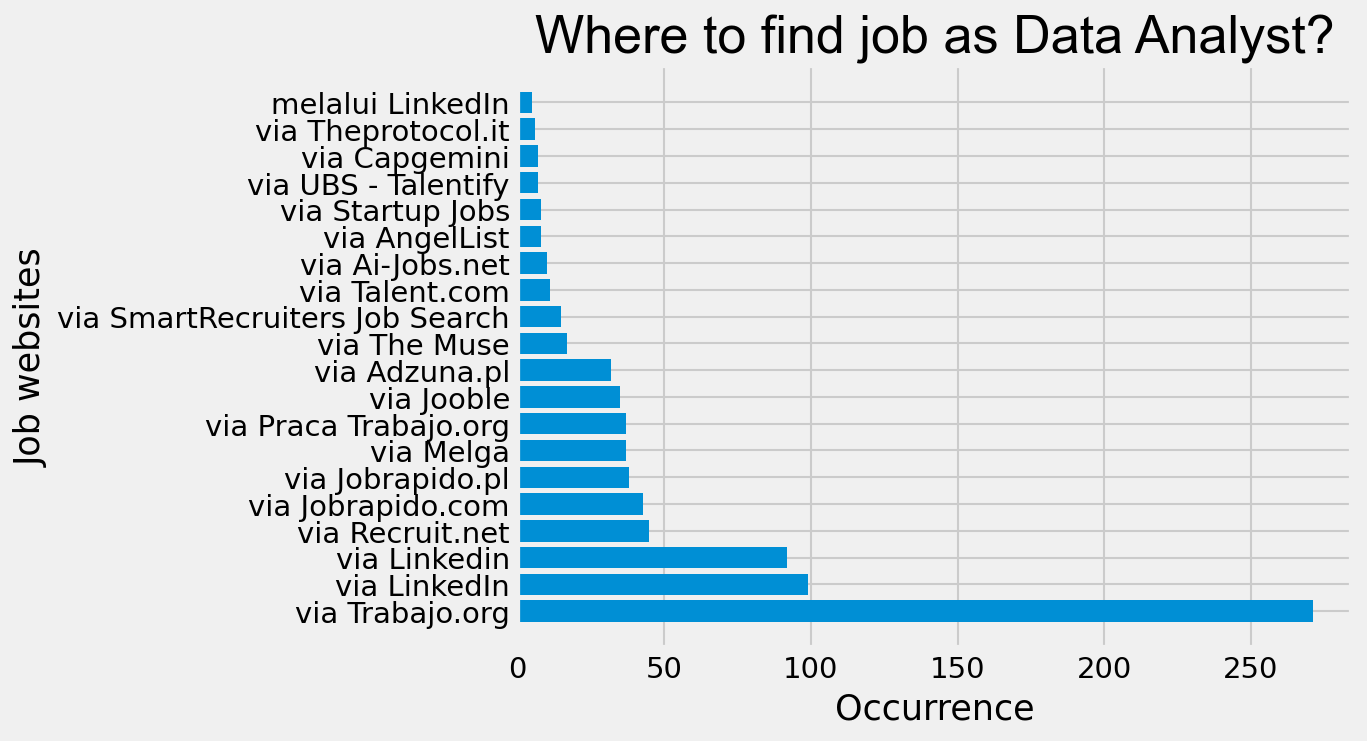

In [17]:
# there was weird case with websites
via=list(df['via'])
countervia=Counter(via).most_common(20)

x,y=zip(*countervia)
plt.figure(dpi=150)
plt.xticks()
plt.yticks()
plt.xlabel('Occurrence')
plt.ylabel('Job websites')
plt.barh(x,y)
plt.title('Where to find job as Data Analyst?', fontdict={'fontname': 'Arial', 'fontsize':25})
plt.show()

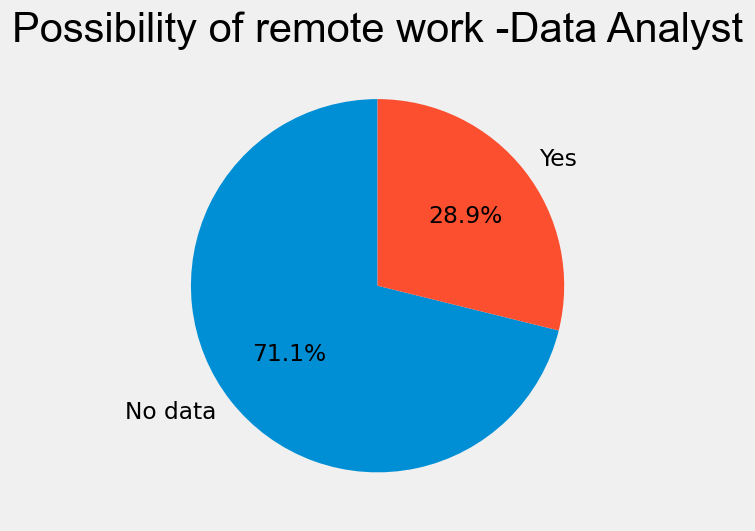

In [18]:
graph_list_circle(df,'remote','remote','Occurrence','Possibility of remote work -Data Analyst',4)

# Data Sciencist

In [19]:
style.use('ggplot')

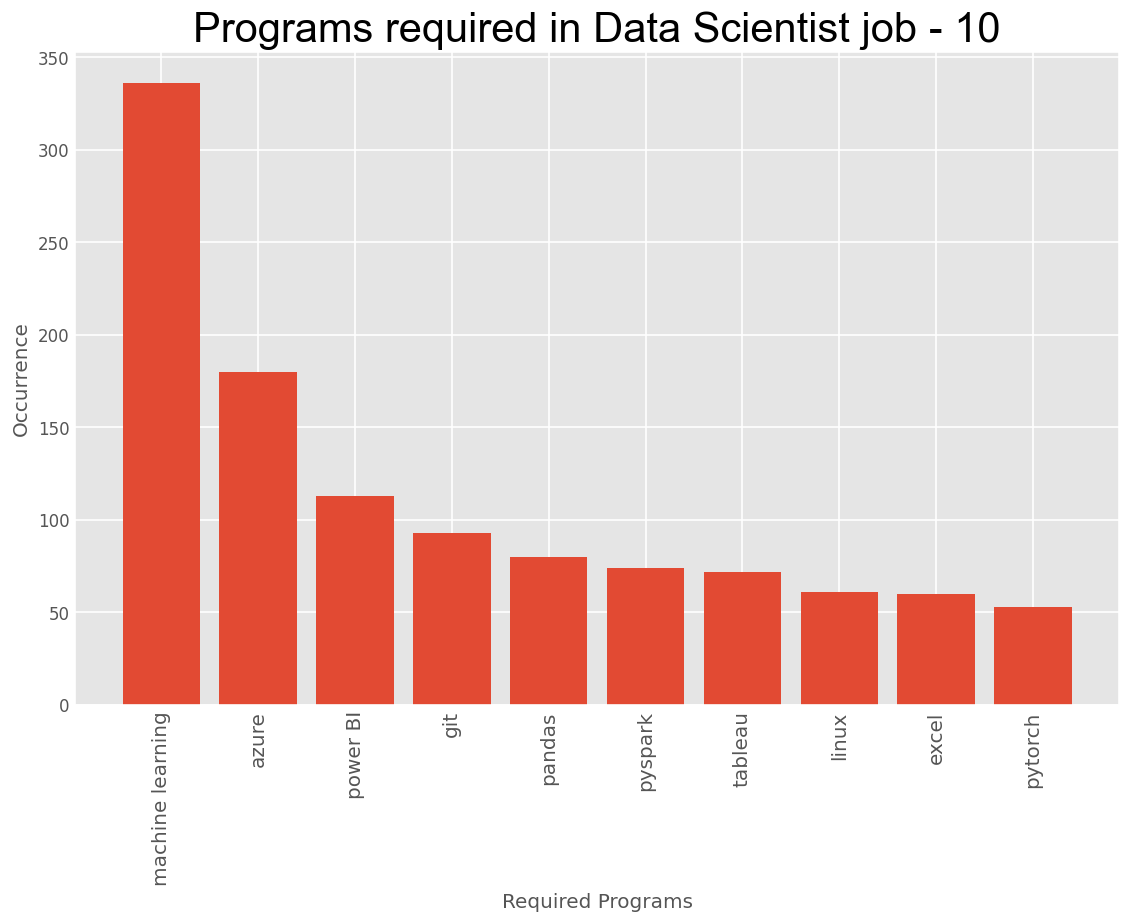

In [20]:
graphc(dfs,'programs','Required Programs','Occurrence','Programs required in Data Scientist job - 10',10)

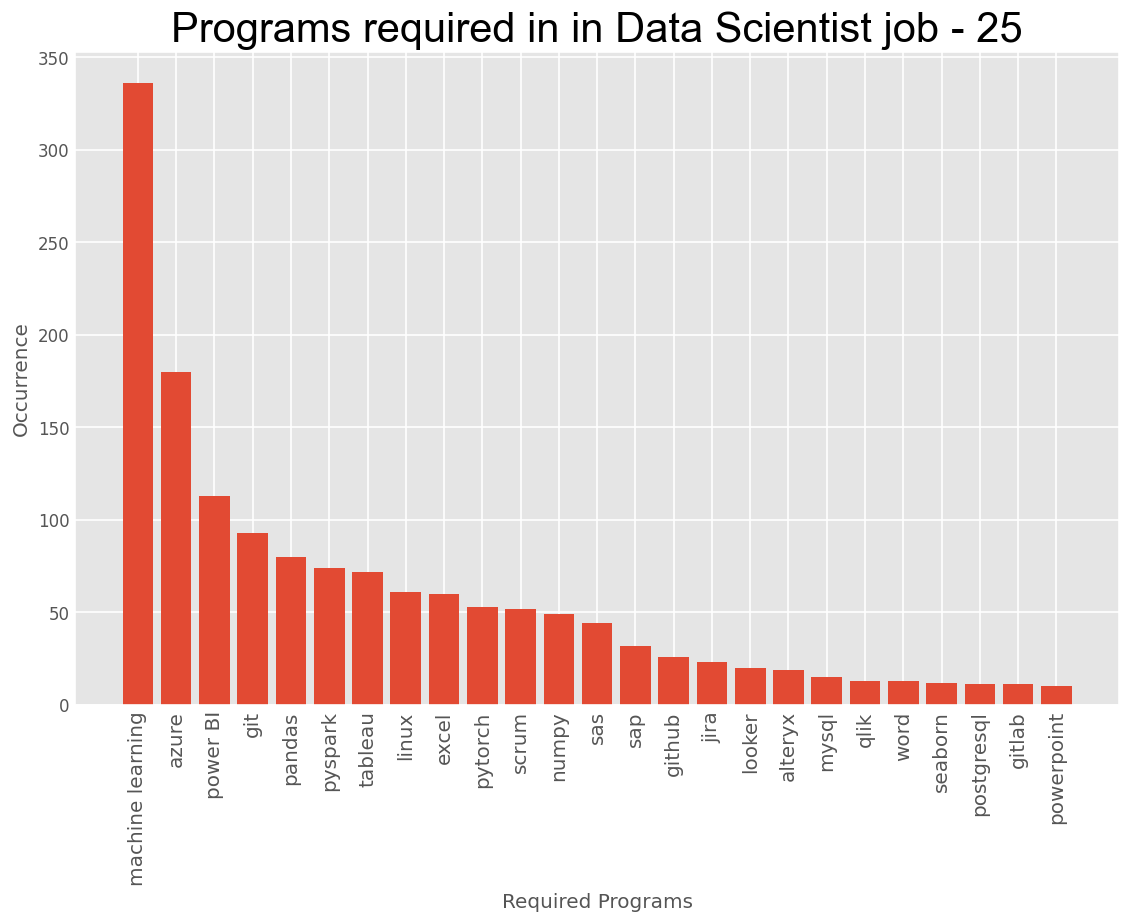

In [21]:
graphc(dfs,'programs','Required Programs','Occurrence','Programs required in in Data Scientist job - 25',25)

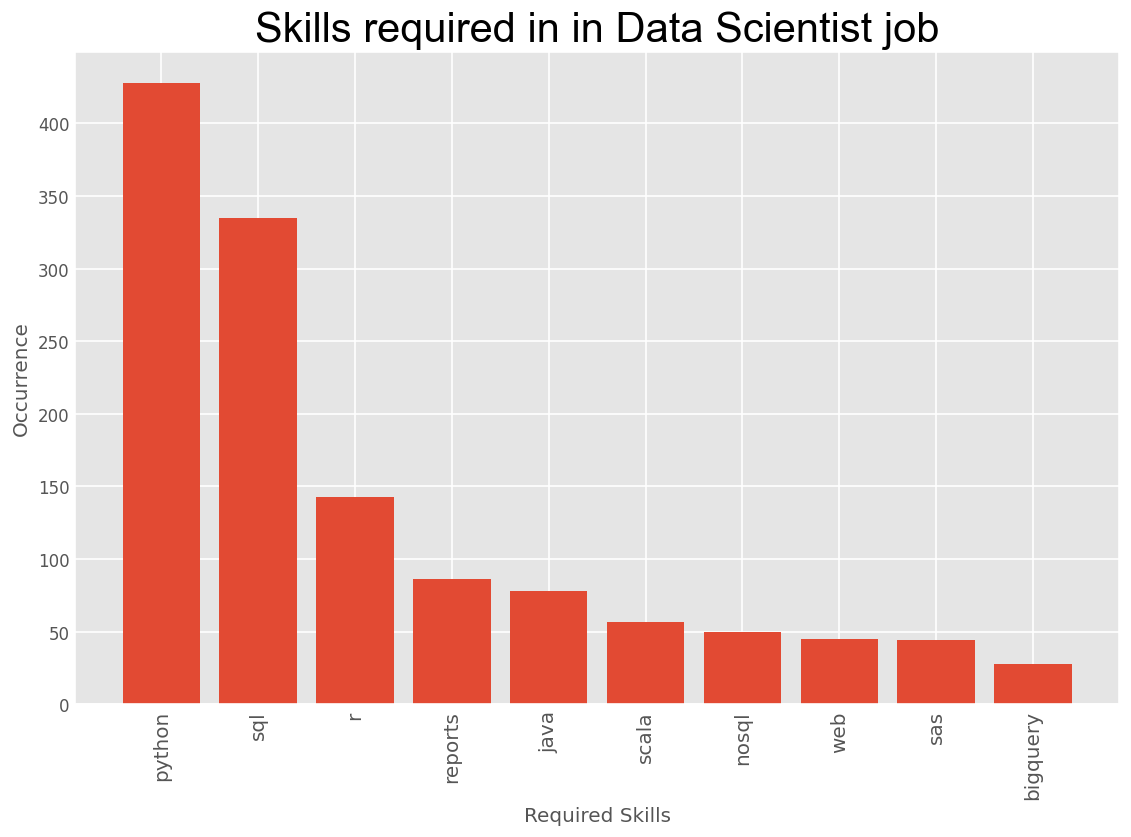

In [22]:
graphc(dfs,'skills','Required Skills','Occurrence','Skills required in in Data Scientist job',10)

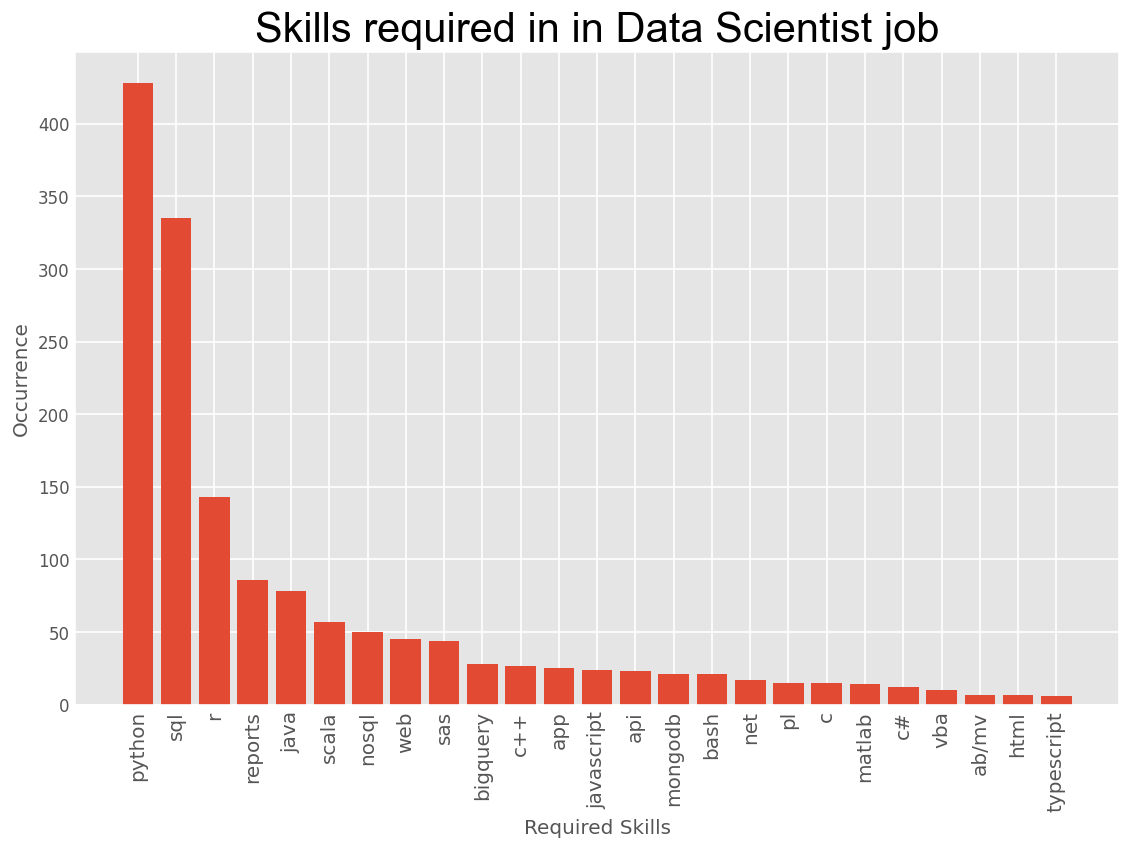

In [23]:
graphc(dfs,'skills','Required Skills','Occurrence','Skills required in in Data Scientist job',25)

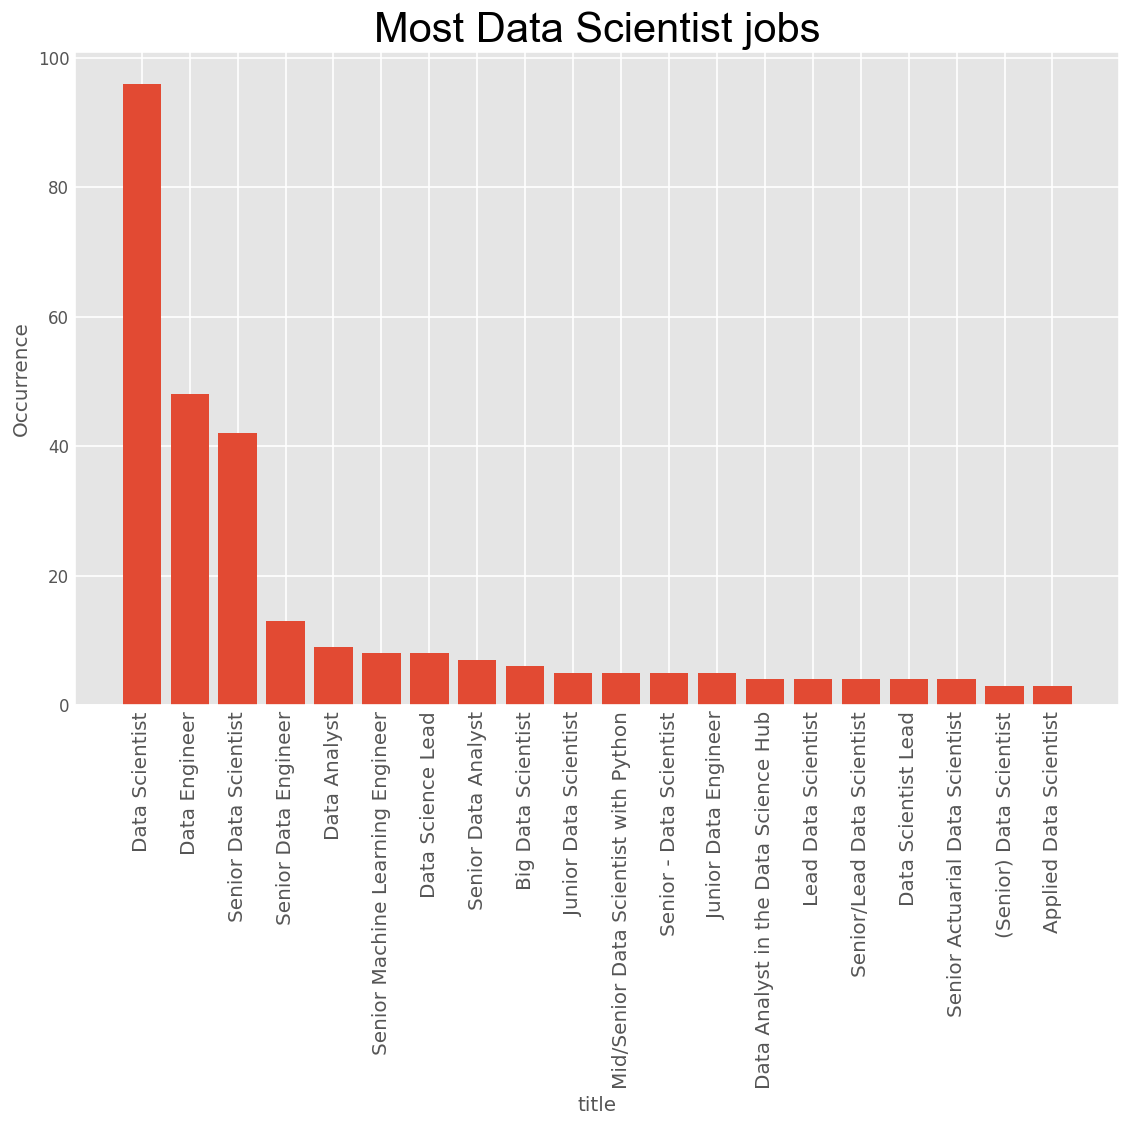

In [24]:
graph_list(dfs,'title','title','Occurrence','Most Data Scientist jobs')

In [25]:
# dfs[dfs['category']=='different']

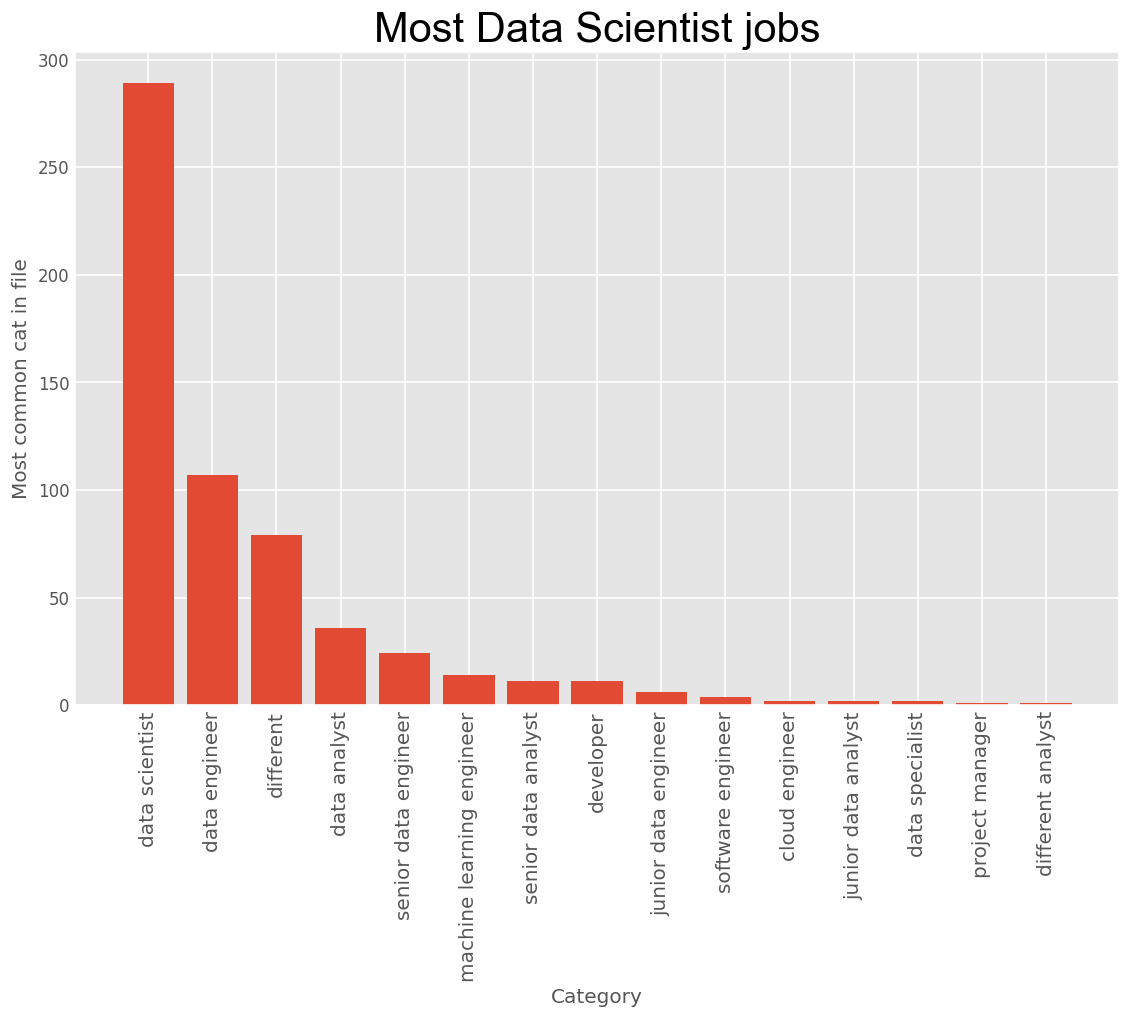

In [26]:
graph_list(dfs,'category','Category','Most common cat in file','Most Data Scientist jobs')

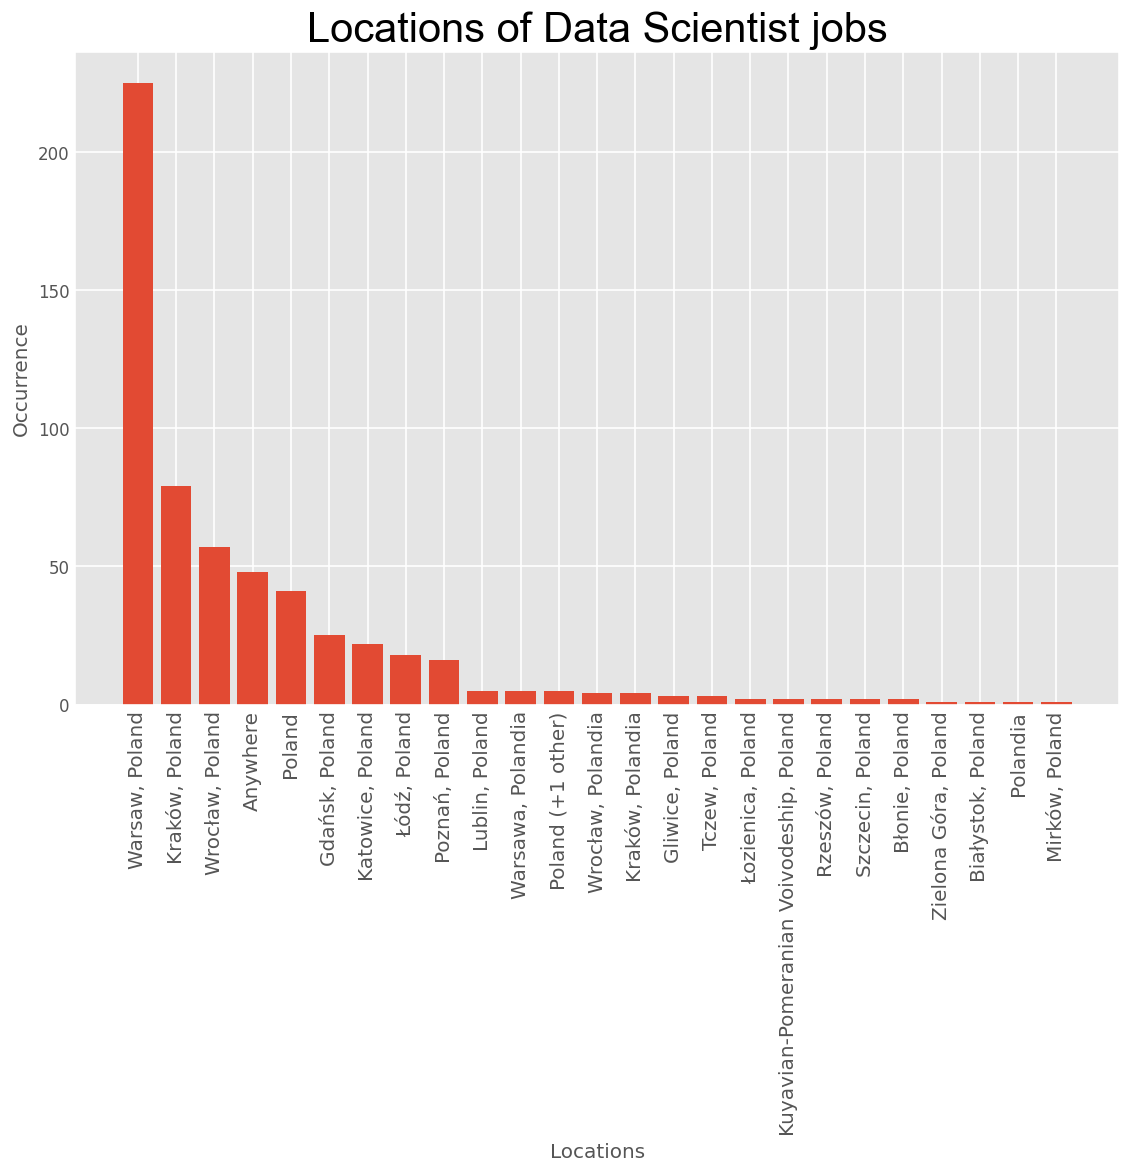

In [27]:
graph_list(dfs,'location','Locations','Occurrence','Locations of Data Scientist jobs',25)

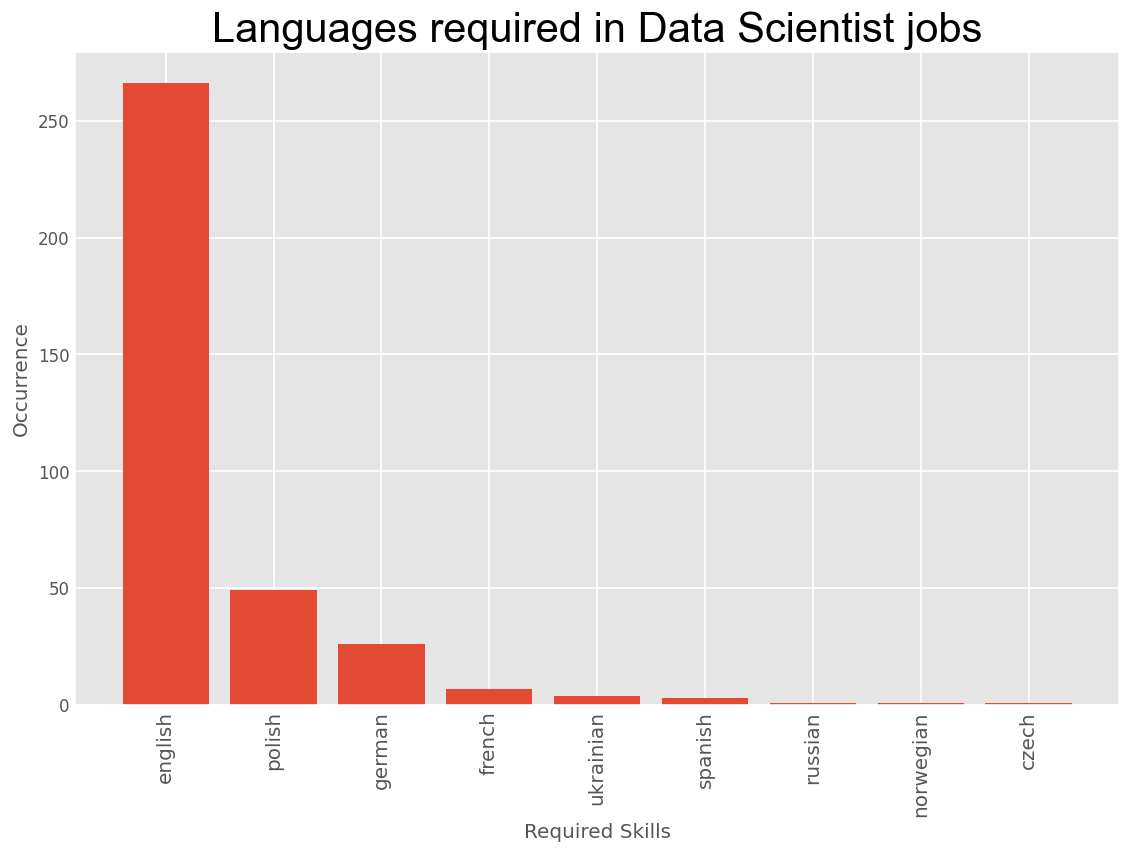

In [28]:
graphc(dfs,'languages','Required Skills','Occurrence','Languages required in Data Scientist jobs',10)

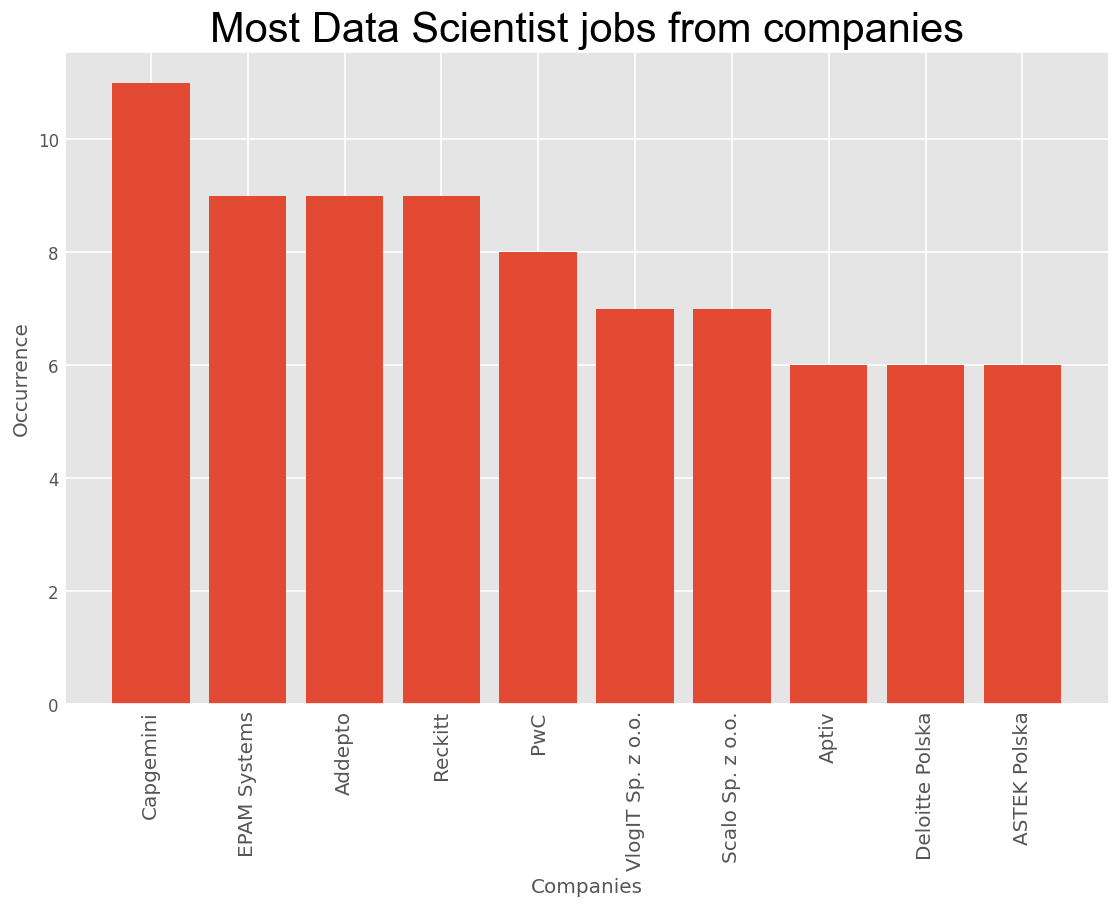

In [29]:
graph_list(dfs,'company_name','Companies','Occurrence','Most Data Scientist jobs from companies',10)

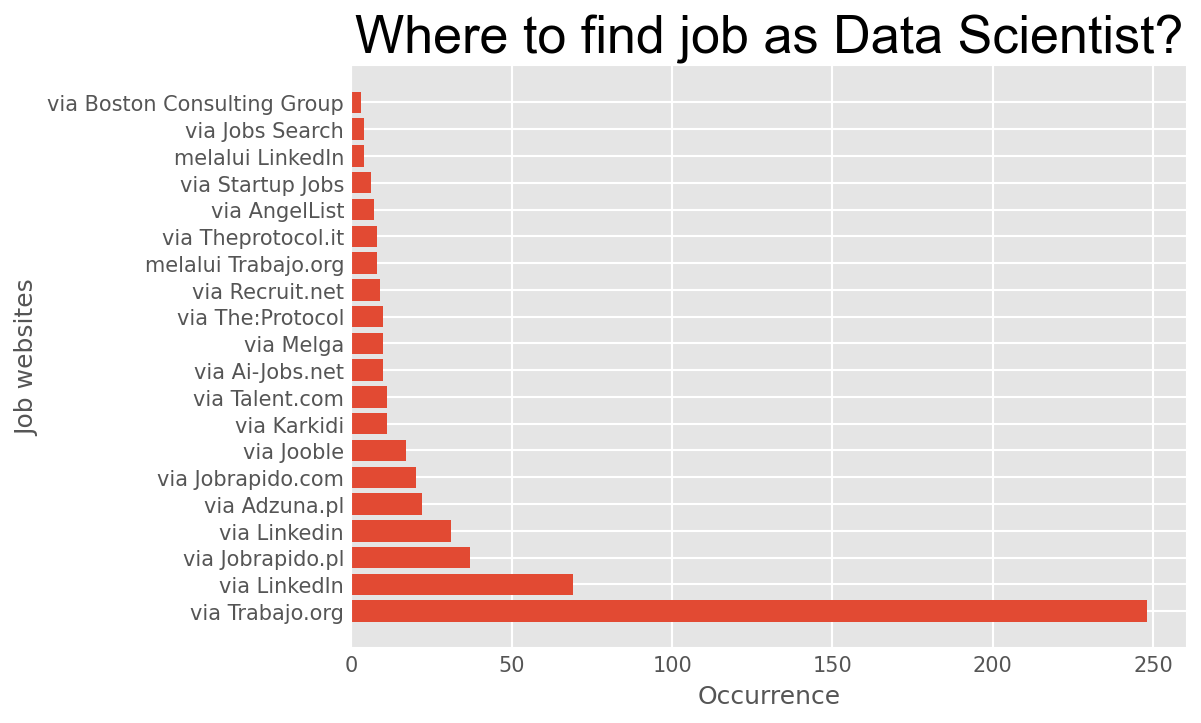

In [30]:
via=list(dfs['via'])
countervia=Counter(via).most_common(20)

x,y=zip(*countervia)
plt.figure(dpi=150)
plt.xticks()
plt.yticks()
plt.xlabel('Occurrence')
plt.ylabel('Job websites')
plt.barh(x,y)
plt.title('Where to find job as Data Scientist?', fontdict={'fontname': 'Arial', 'fontsize':25})
plt.show()

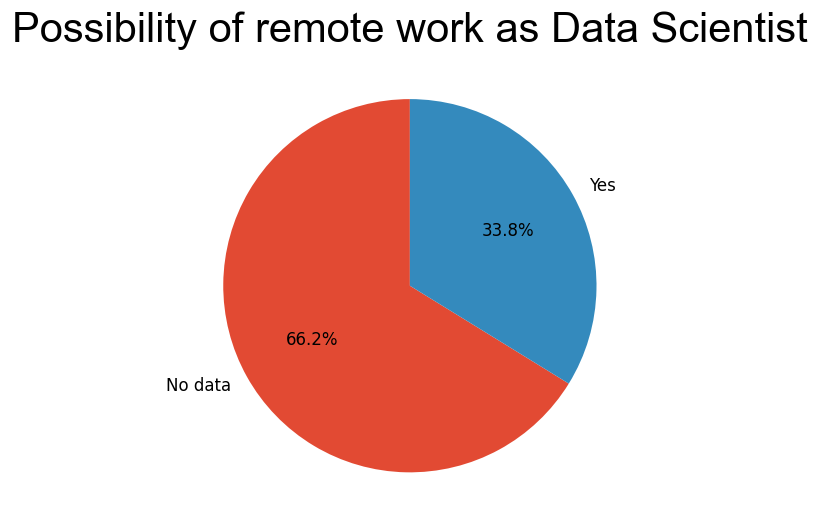

In [31]:
graph_list_circle(dfs,'remote','remote','Occurrence','Possibility of remote work as Data Scientist',4)